# Plotting Data with Projections and Cartopy Features

In [1]:
import cartopy.crs as ccrs
import xarray as xr

from geokube.core.datacube import from_xarray

In [2]:
air_temp = xr.tutorial.load_dataset('air_temperature')
air_temp = air_temp.isel(indexers={'time': [0, 1]})
air_temp

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.4 296.4 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
dcube = from_xarray(air_temp)
field = dcube['air']
field

<Field(139809156219072)>

In [4]:
field.domain.crs

GeogCS(6371229.0)

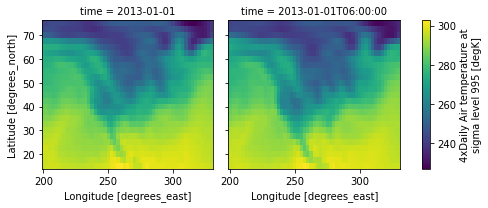

In [5]:
field.plot()

### Projections

The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like).

The `transform` argument to plotting functions tells Cartopy what coordinate system the data are defined in. This argument cannot be passed explicitly. It is deduced form the datacube data members.

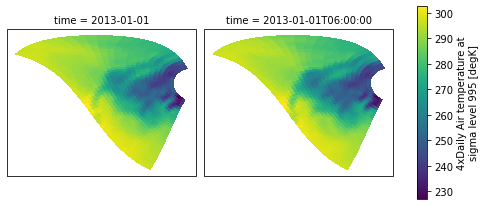

In [6]:
rpole = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
field.plot(projection=rpole)

### Gridlines and Features

When `projection` is specified, it is possible to add:

* **Gridlines** with or without labels using `gridlines` and `gridline_labels`
* **Cartopy features** using `features` including:
  * Borders
  * Coastline
  * Lakes
  * Land
  * Ocean
  * Rivers
  * States

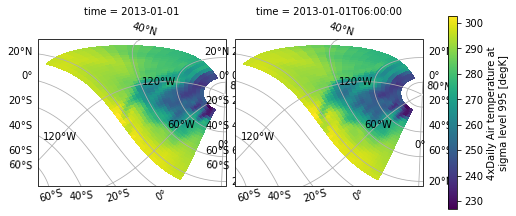

In [7]:
field.plot(projection=rpole, gridlines=True)

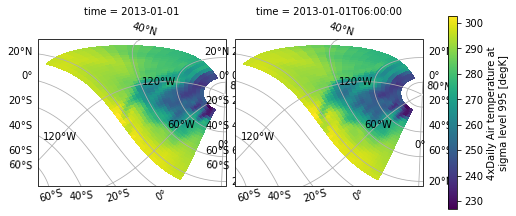

In [8]:
field.plot(projection=rpole, gridlines=True, gridline_labels=True)

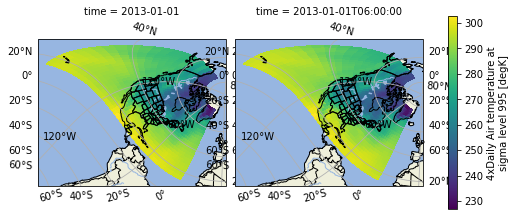

In [9]:
features = (
    'borders', 'coastline', 'lakes', 'land', 'ocean', 'rivers', 'states'
)
field.plot(
    projection=rpole, gridlines=True, gridline_labels=True, features=features
)

### Figure Size and Additional Properties

The size of the figure can be controlled with `figsize`.

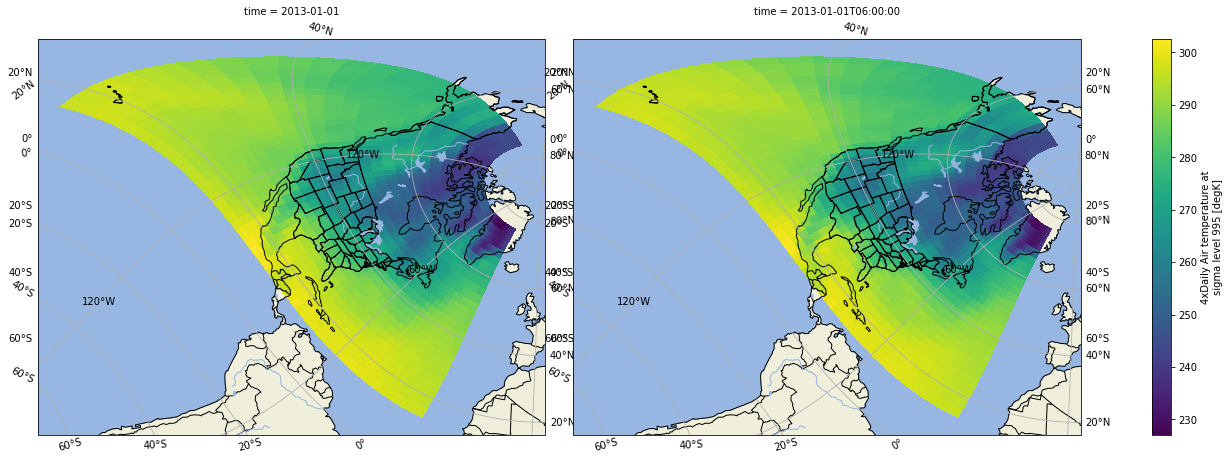

In [10]:
field.plot(
    projection=rpole, gridlines=True, gridline_labels=True, features=features,
    figsize=(20, 6)
)

Additional arguments can be passed to `matplotlib` subplots with `subplot_kwargs`:

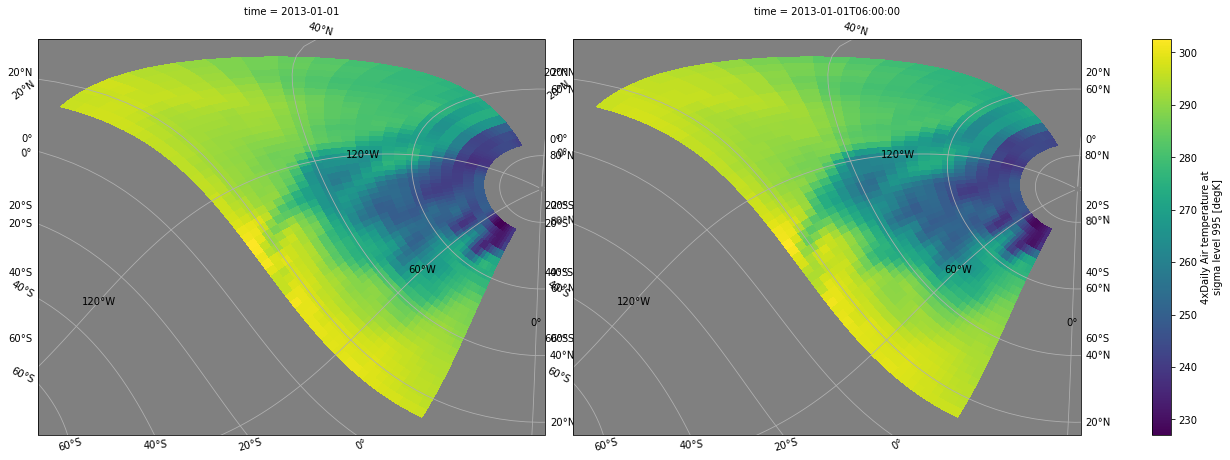

In [11]:
field.plot(
    projection=rpole, gridlines=True, gridline_labels=True, figsize=(20, 6),
    subplot_kwargs={'facecolor': 'gray'}
)

Additional arguments can be passed to `matplotlib` as keyword arguments.

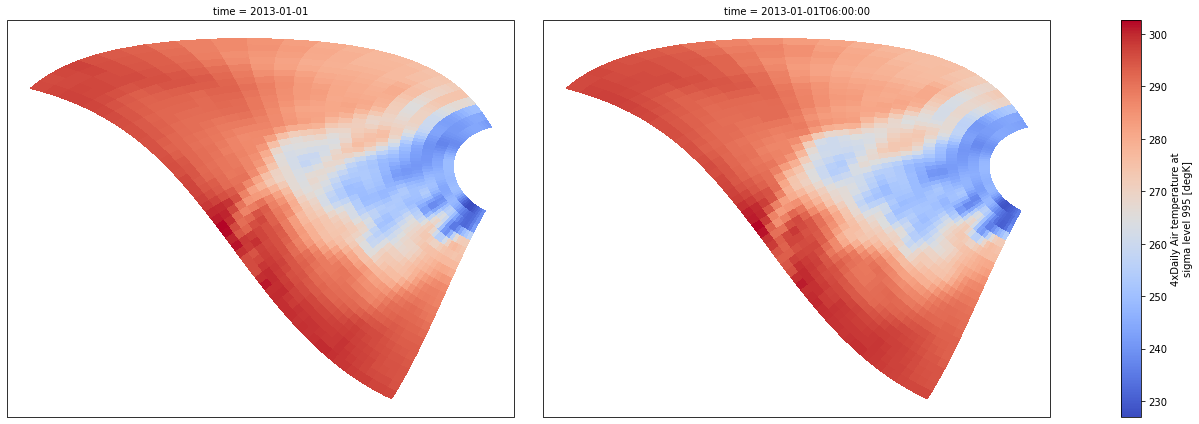

In [12]:
field.plot(projection=rpole, figsize=(20, 6), cmap='coolwarm')

The argument `robust=True` can be used to get better color gradients since it represents narrower interval of values — between the 2nd and 98th percentiles.

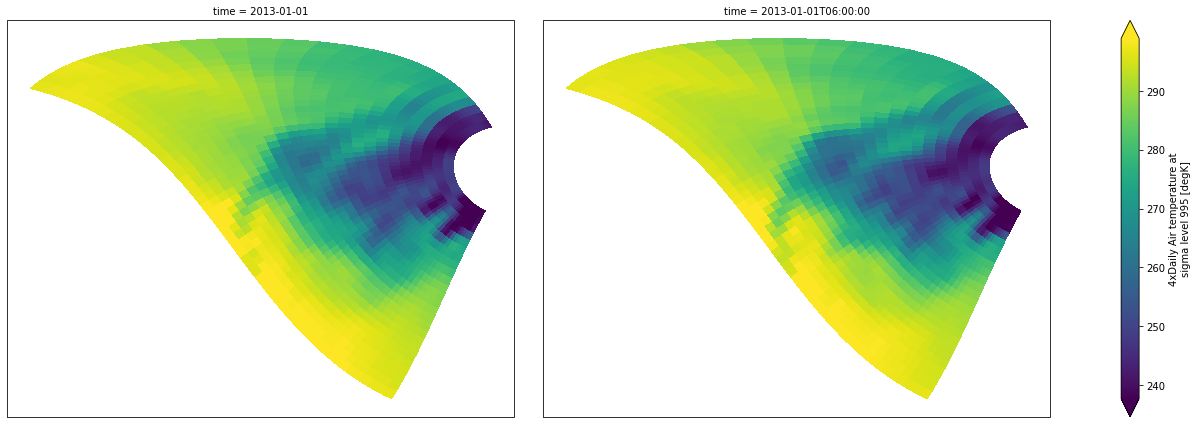

In [13]:
field.plot(projection=rpole, figsize=(20, 6), robust=True)